## Autoencoder

# Background
An autoencoder is a neural network that takes an input, encodes it into a lower-dimensional latent space through "encoding" layers, and then attempts to reconstruct the original input using "decoding" layers. Autoencoders are often used for dimensionality reduction.

# Task
You will train a 64x16x64 autoencoder on the digits dataset. All of the following work should be done in a Jupyter Notebook.

In [2]:
# Import all the necessary libraries
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

from nn.nn import NeuralNetwork

# Import PyTorch for comparison
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable as V   

## 1. Load the digits dataset

In [3]:
# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

(1797, 64) (1797,)


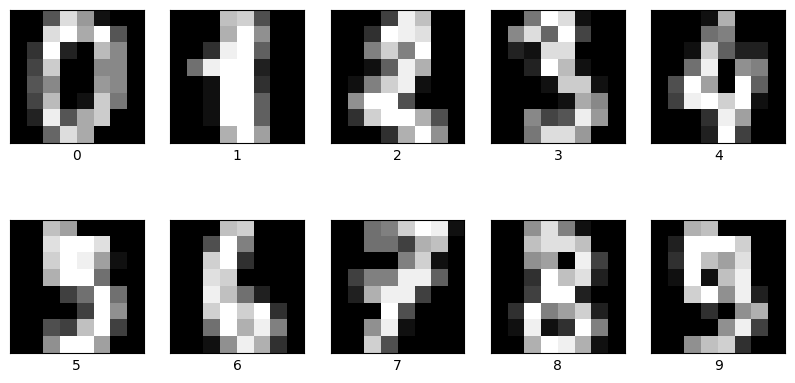

In [4]:
# print the shape of the data
print(X.shape, y.shape)

# visualize set of images
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=digits.target[i])
plt.show()

# 2. Split the data into training and validation sets.

In [5]:
# Split the dataset into training, testing and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# 3. Generate an instance of your NeuralNetwork class with a 64x16x64 autoencoder architecture.

In [6]:
nn_arch=[
    {"input_dim": 64, "output_dim": 16, "activation": "relu"},
    {"input_dim": 16, "output_dim": 64, "activation": "relu"}
]

# 4. Train your autoencoder on the training data.

In [7]:
# train the neural network
autoencoder = NeuralNetwork(nn_arch=nn_arch, lr=0.03, seed=42, batch_size=4, epochs=1000, loss_function='mean_squared_error')
train_loss, val_loss = autoencoder.fit(X_train, X_train, X_val, X_val)

Epoch: 0, Train Loss: 14.798899362529365, Val Loss: 15.120470844513655
Epoch: 1, Train Loss: 11.195887573629504, Val Loss: 11.52824328565605
Epoch: 2, Train Loss: 9.568971729758706, Val Loss: 9.752610050963066
Epoch: 3, Train Loss: 8.736872693975032, Val Loss: 8.84760698739492
Epoch: 4, Train Loss: 8.27114717810446, Val Loss: 8.388605096826286
Epoch: 5, Train Loss: 7.8900995288270055, Val Loss: 8.019645859971957
Epoch: 6, Train Loss: 7.62496820856143, Val Loss: 7.742162017519816
Epoch: 7, Train Loss: 7.489020315324058, Val Loss: 7.602395910342316
Epoch: 8, Train Loss: 6.563783400548455, Val Loss: 6.821992291481751
Epoch: 9, Train Loss: 6.407468453865558, Val Loss: 6.669121058296732
Epoch: 10, Train Loss: 6.3437676970007235, Val Loss: 6.664868997208248
Epoch: 11, Train Loss: 6.279117069104178, Val Loss: 6.528970138001091
Epoch: 12, Train Loss: 6.282001866068029, Val Loss: 6.589284990748221
Epoch: 13, Train Loss: 6.198702627496388, Val Loss: 6.493384905021308
Epoch: 14, Train Loss: 6.205

# 5. Plot your training and validation loss by epoch.

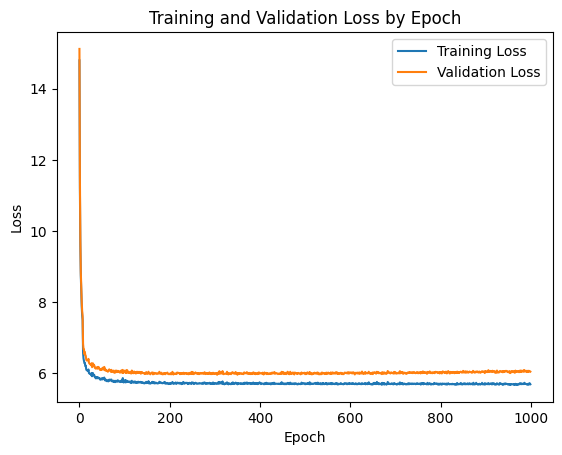

In [8]:
# Plot training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss by Epoch')
plt.show()


# 6. Quantify your average reconstruction error over the validation set.

Average reconstruction error: 6.038707


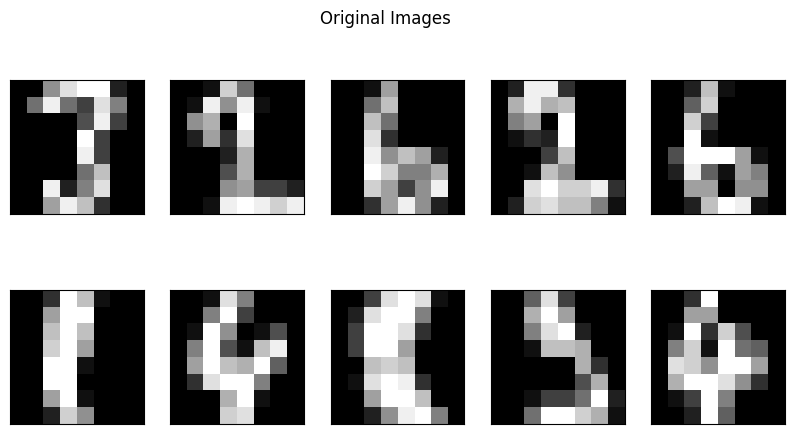

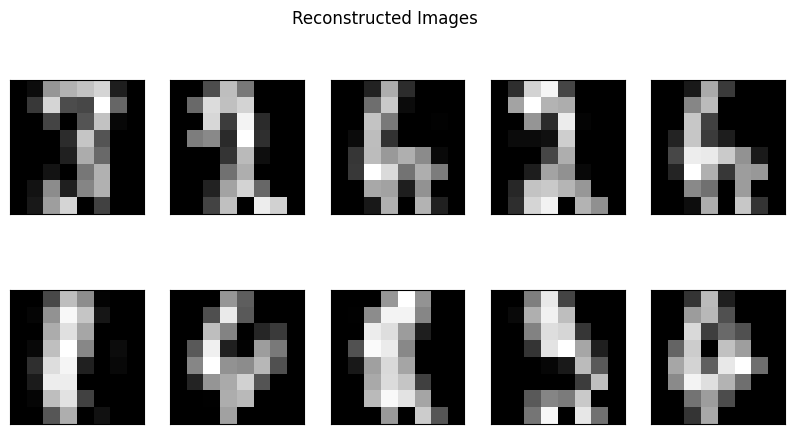

In [9]:
# Compute average reconstruction error on validation set
y_val_pred = autoencoder.predict(X_val)
reconstruction_error = np.mean((X_val - y_val_pred) ** 2)
print(f'Average reconstruction error: {reconstruction_error:.6f}')

# Visualize the original and reconstructed images
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_val[i].reshape(8, 8), cmap='gray')
    axi.set(xticks=[], yticks=[])
plt.suptitle('Original Images')
plt.show()
# reconstructed images
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i, axi in enumerate(ax.flat):
    axi.imshow(y_val_pred[i].reshape(8, 8), cmap='gray')
    axi.set(xticks=[], yticks=[])
plt.suptitle('Reconstructed Images')
plt.show()

# 7. Explain why you chose the hyperparameter values you did.
I chose these hyperparameter values based on a balance between training stability and efficiency:

- lr=0.03 (Learning Rate): I wanted the model to learn at a decent pace without overshooting. A lower value (e.g., 0.001) would make training too slow, while a higher value (e.g., 0.1) might make it unstable.
- seed=42: Just to keep results reproducible. Classic choice.
- batch_size=4: a small batch size helps capture more detailed patterns. I tried 8, 16, and 32. Larger batch sizes not working well. 
- epochs=1000: Autoencoders sometimes take a while to converge, so I wanted to give it enough time to optimize properly.
- loss_function='mean_squared_error': Since we're reconstructing inputs, MSE makes sense as it penalizes large differences between the original and reconstructed values.

# P.S The following sections are validation of the result using Pytorch

In [72]:
# PyTorch implementation
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(64, 16),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 64),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

Epoch 0: Train Loss = 55.313744, Val Loss = 55.949272
Epoch 100: Train Loss = 51.072399, Val Loss = 51.939270
Epoch 200: Train Loss = 51.048740, Val Loss = 51.915703
Epoch 300: Train Loss = 51.041519, Val Loss = 51.909515
Epoch 400: Train Loss = 51.038635, Val Loss = 51.907444
Epoch 500: Train Loss = 51.036549, Val Loss = 51.906429
Epoch 600: Train Loss = 51.025192, Val Loss = 51.897148
Epoch 700: Train Loss = 51.021236, Val Loss = 51.892368
Epoch 800: Train Loss = 51.019730, Val Loss = 51.891148
Epoch 900: Train Loss = 51.018688, Val Loss = 51.890430


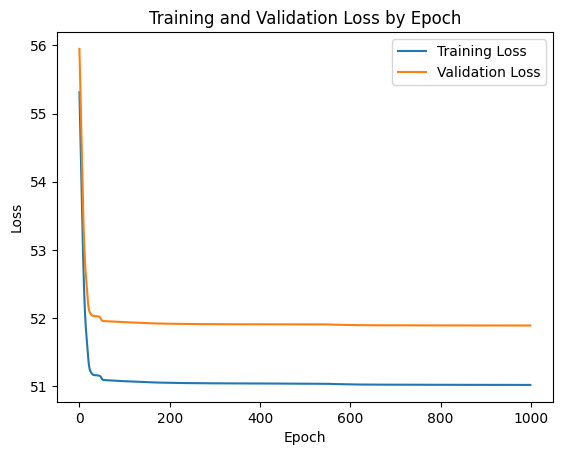

In [75]:
# Defome the model architecture
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(64, 16),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 64),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Initialize the model and define the loss function and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)

# Train the model
train_loss_list = []
val_loss_list = []

for epoch in range(1000):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, X_train_tensor)
    loss.backward()
    optimizer.step()

    # Record the training loss
    train_loss_list.append(loss.item())

    # Record the validation loss
    model.eval()
    with torch.no_grad():
        val_output = model(X_val_tensor)
        val_loss = criterion(val_output, X_val_tensor).item()
        val_loss_list.append(val_loss)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Train Loss = {loss.item():.6f}, Val Loss = {val_loss:.6f}")

# Plot training and validation loss
plt.plot(train_loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss by Epoch')
plt.show()

Average reconstruction error: 51.889889


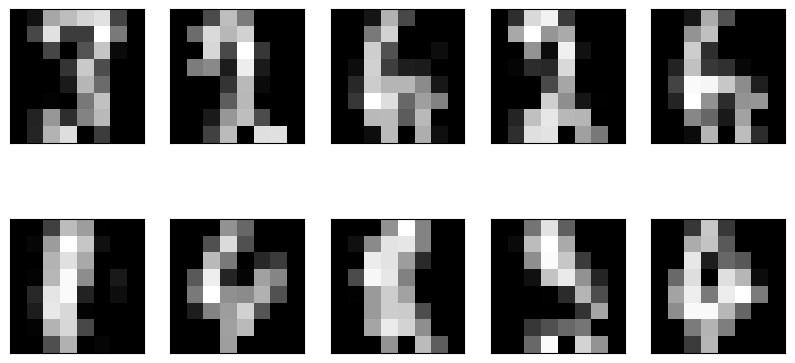

In [76]:
# Compute average reconstruction error on validation set
model.eval()
output = model(X_val_tensor)
reconstruction_error = criterion(output, X_val_tensor)
print(f'Average reconstruction error: {reconstruction_error.item():.6f}')

# Visualize the reconstructed images
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i, axi in enumerate(ax.flat):
    axi.imshow(y_val_pred[i].reshape(8, 8), cmap='gray')
    axi.set(xticks=[], yticks=[])
plt.show()